# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [92]:
#verificar topos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [93]:
# verificando numero de nulos por categoria
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [94]:
#calculo dos percentuais faltantes
faltantes_percentual = (df.isnull().mean()*100).reset_index() # calcula media % dos dados nulos
faltantes_percentual.columns = ['Coluna', 'Percentual_Nulo']  # renomeia colunas do df criado
faltantes_percentual.sort_values('Percentual_Nulo', ascending=False) # organiza Df de forma de com o valores

,Coluna,Percentual_Nulo
6,PhoneService,59.28
13,Pagamento_Mensal,13.00
1,Genero,0.48
15,Churn,0.20
3,Casado,0.00
4,Dependents,0.00
2,Idoso,0.00
0,customerID,0.00
7,Servico_Internet,0.00
5,Tempo_como_Cliente,0.00


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

a coluna genero não possui percentual relevante de valores nulos para afetar a analise e é uma categoria sem muito peso para a analise de churn.
a coluna churn apesar de ser muito importante a quantidade é muito pequena em relação ao tamanho do nosso banco de dados, ao inves de fazer um preenchimento que pode enviezar os dados, resolvi excluir as poucas linhas nulas 

In [95]:
# exclusão das linhas nulas
df.dropna(subset=['Genero'], inplace=True) ### exclusão dos nulos da categoria "genero" por representa uma % muito pequena dos dados
df.dropna(subset=['Churn'], inplace=True)  ### excluão dos nulos da categoria "churn" por representar um % muito pequeno dos dados

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [96]:
# calculo de média do pagamento_mensal
media_pagamento = df['Pagamento_Mensal'].mean().round(2) # calculo da médio 
print("Média de pagamento  Mensal: ", media_pagamento)
mediana_pagamento = df['Pagamento_Mensal'].median() # calcula da mediana
print("Mediana de Pagamento Mensal: ", mediana_pagamento)

Média de pagamento  Mensal:  65.61
Mediana de Pagamento Mensal:  71.45


media e mediana nao coincidem, o que pode indicar outliers, utilizarei o calculo do desvio padrão para ver se temos muitos valores que se afastao da media e um boxplot para verificar os outliers se estão acima ou abaixo

desvio: 29.931520109798708


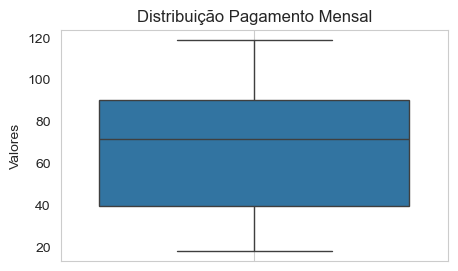

In [97]:
# calculo do desvio padrão
desvio_pagamento = df['Pagamento_Mensal'].std()
print('desvio:' , desvio_pagamento) # valores entre 36 - 94

# boxplot para verificação do outliers
sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y='Pagamento_Mensal')
plt.title('Distribuição Pagamento Mensal')
plt.ylabel('Valores')
plt.grid()
plt.show()

com este dois dados vemos que temos um valores dissonantes mas nada acima dos quartis do boxplot e pouco acima do valores do desvio padrão, assim ocasionando a diferença entre media e mediana, com isso vejo que utiliza a media como dados para completar as informações do nulo nao nos trara muito risco de enviezar os dados

In [98]:
# prenchimento dos dados nulos com a media na coluna pagamento_mensal
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(media_pagamento)

In [99]:
df['Pagamento_Mensal'].isnull().sum() # verificando se todos os valores foram substituidos

np.int64(0)

Agora para tratar os valores nulos da variavel categorica

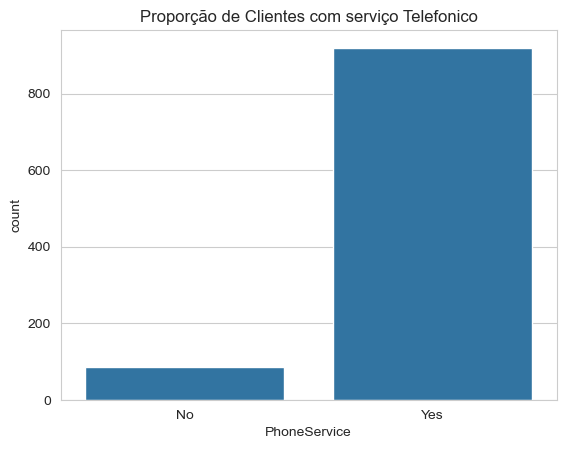

PhoneService
Yes    91.451292
No      8.548708
Name: proportion, dtype: float64


In [100]:
# grafico de barras para visualização de variavel categorico
sns.countplot(x='PhoneService', data=df) # conta as categorias de phoneservice
plt.title('Proporção de Clientes com serviço Telefonico') # titulo
plt.show()
print(df['PhoneService'].value_counts(normalize=True)*100) #conta em percentual a proporção

preencher os dados da categoria PhoneService conforme a proporção pode gerar um vies, porem temos um desequilibrio muito grande da proporção dos clientes com e sem o serviço, emtão chance de enviezar os dados é muito menor do que em outras categorias

In [101]:
# prenchimento dos dados nulos com a media na coluna PhoneService
df['PhoneService'] = df['PhoneService'].fillna('YES')

In [102]:
df['PhoneService'].isnull().sum() # verificando se todos os valores foram substituidos

np.int64(0)

In [103]:
df.isnull().sum() # verificação final do dados validos

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
PhoneService          0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma diferente e corrija.

In [104]:
df['Genero'].unique() # verificando possiveis erros de escrita e fonte

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [105]:
df['Casado'].unique() # verificando possiveis erros de escrita e fonte

array(['Yes', 'No'], dtype=object)

In [106]:
df['Dependents'].unique() # verificando possiveis erros de escrita e fonte

array(['No', 'Yes'], dtype=object)

In [107]:
df['Tipo_Contrato'].unique() # verificando possiveis erros de escrita e fonte

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [108]:
df['PhoneService'].unique() # verificando possiveis erros de escrita e fonte

array(['No', 'Yes', 'YES'], dtype=object)

In [109]:
#tratamento dos dados da coluna Servico_Internet que possui escritas diferentes
df['Servico_Internet'].unique() # verificando possiveis erros de escrita e fonte

array(['DSL', 'No', 'Fiber optic', 'dsl'], dtype=object)

In [110]:
df['Servico_Seguranca'].unique() # verificando possiveis erros de escrita e fonte

array(['No', 'Yes', 'No internet service'], dtype=object)

In [111]:
df['StreamingTV'].unique() # verificando possiveis erros de escrita e fonte

array(['No', 'No internet service', 'Yes'], dtype=object)

In [112]:
df['Tipo_Contrato'].unique() # verificando possiveis erros de escrita e fonte

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [113]:
df['PaymentMethod'].unique() # verificando possiveis erros de escrita e fonte

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## apos a verificação que somente a categoria Servico_Internet, genero, PhoneService tem dados que necessita tratamento

In [114]:
df['Servico_Internet'] = df['Servico_Internet'].str.upper() # normalizando os dados como caixa alta
df['Servico_Internet'].value_counts() # verificando se nao há outro erros

Servico_Internet
FIBER OPTIC    1119
DSL             842
NO              527
Name: count, dtype: int64

In [115]:
df['Genero'] = df['Genero'].str.upper() # normalizando os dados como caixa alta
df['Genero'] = df['Genero'].replace({'FEMALE':'F', 'MALE':'M'}) # normalizando modo de escrita
df['Genero'].value_counts() # verificando se nao há outro erros

Genero
M    1269
F    1219
Name: count, dtype: int64

In [116]:
df['PhoneService'] = df['PhoneService'].str.upper() # normalizando os dados como caixa alta
df['PhoneService'].value_counts() # verificando se nao há outro erros

PhoneService
YES    2402
NO       86
Name: count, dtype: int64

## tratar dados categoricos que podem ser considerados como numericos para novos insights futuramente

In [117]:
# tratando Casado para boleana
df['Casado']= df['Casado'].astype(bool)
df['Casado']

0       True
1       True
2       True
3       True
16      True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Name: Casado, Length: 2488, dtype: bool

In [118]:
# tratando Dependents para boleana
df['Dependents']= df['Dependents'].astype(bool)
df['Dependents']

0       True
1       True
2       True
3       True
16      True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Name: Dependents, Length: 2488, dtype: bool

In [119]:
# tratando PhoneService para boleana
df['PhoneService'] = df['PhoneService'].astype(bool)
df['PhoneService'] 

0       True
1       True
2       True
3       True
16      True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Name: PhoneService, Length: 2488, dtype: bool

In [127]:
# tratando Suporte_Tecnico para boleana
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].astype(bool)
df['Suporte_Tecnico'] 

0       True
1       True
2       True
3       True
16      True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Name: Suporte_Tecnico, Length: 2488, dtype: bool

In [124]:
# tratando StreamingTV para boleana
df['StreamingTV']= df['StreamingTV'].astype(bool)
df['StreamingTV']

0       True
1       True
2       True
3       True
16      True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Name: StreamingTV, Length: 2488, dtype: bool

In [121]:
# tratando Churn para boleana
df['Churn']= df['Churn'].astype(bool)
df['Churn']

0       True
1       True
2       True
3       True
16      True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Name: Churn, Length: 2488, dtype: bool

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [122]:
#renomear colunas para portugues ou inglês
df.rename(columns ={'Genero':'Gender',	'Idoso':'Elderly',	'Casado':'Married',	'Tempo_como_Cliente':'Time_as_Client',	'Servico_Internet':'Internet_Service',	'Servico_Seguranca':'Security_Service',	'Suporte_Tecnico':'Suport', 'Tipo_Contrato':'Contract_Type',	'Pagamento_Mensal':'Monthly_Payment',	'Total_Pago':'Total_Paid'}, inplace=True),

(None,)

In [128]:
df.head()

,customerID,Gender,Elderly,Married,Dependents,Time_as_Client,PhoneService,Internet_Service,Security_Service,Suport,StreamingTV,Contract_Type,PaymentMethod,Monthly_Payment,Total_Paid,Churn,Suporte_Tecnico
0,7590-VHVEG,F,0,True,True,1,True,DSL,No,No,True,Month-to-month,Electronic check,29.85,29.85,True,True
1,5575-GNVDE,M,0,True,True,34,True,DSL,Yes,No,True,One year,Mailed check,56.95,1889.50,True,True
2,3668-QPYBK,M,0,True,True,2,True,DSL,Yes,No,True,Month-to-month,Mailed check,53.85,108.15,True,True
3,7795-CFOCW,M,0,True,True,45,True,DSL,Yes,Yes,True,One year,Bank transfer (automatic),65.61,1840.75,True,True
16,8191-XWSZG,F,0,True,True,52,True,NO,No internet service,No internet service,True,One year,Mailed check,65.61,1022.95,True,True


In [130]:
df.to_csv('CHURN_CREDIT_MOD14_PART2.csv', index=False)